# Data analysis 4 - Lecture 1
This lecture is about basics of the tensorflow, we will discuss the minimal example on the MNIST dataset.

We also investigate a meaning of the validation sets and different complexity of the model. 

[Open in Google colab](https://colab.research.google.com/github/jplatos/2019-2020-da4/blob/master/ds4_01.ipynb)
[Download from Github](https://raw.githubusercontent.com/jplatos/2019-2020-DA4/master/ds4_01.ipynb)


### Import of the TensorFlow
The main version of the TensorFlow (TF) is a in the Version package in the field VERSION
Since the TensformFlow 2.0 everything was encapsulaed under the KERAS api.

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.version.VERSION)

2.3.0


### Import a dataset
Datasets are stored in the keras.datasets submodule. Few testing datasets are stored here and installed together with the TF package

In [5]:
# mnist is the basic dataset with handwritten digits
mnist = tf.keras.datasets.mnist

# data from any dataset are loaded using the load_Data function
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# the data are in the form of 28x28 pixes with values 0-255.
print('Train data shape: ', x_train.shape)
print('Test data shape:  ', x_test.shape)

Train data shape:  (60000, 28, 28)
Test data shape:   (10000, 28, 28)


### Lets look on the data how do they look like.

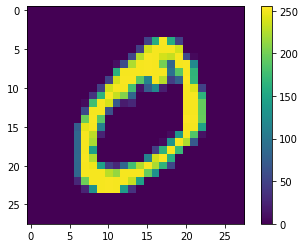

In [6]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

### The conversion into range 0-1 is done by the division

In [7]:
# The conversion into range 0-1 is done by the division
x_train, x_test = x_train / 255.0, x_test / 255.0

### Make better visualization of the data to better understand how complex they are

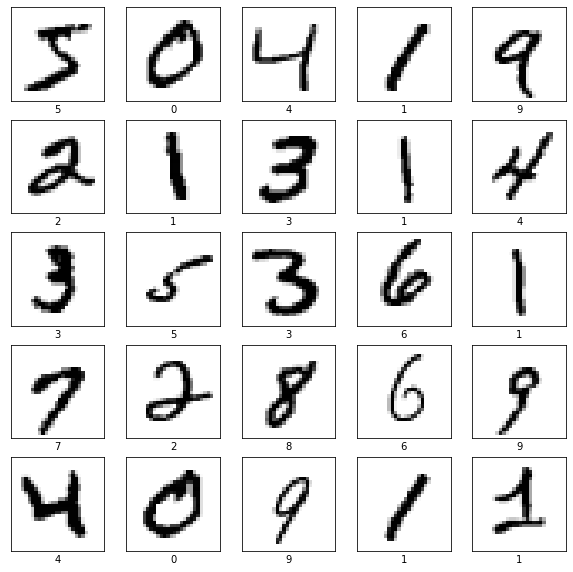

In [8]:
class_names = [str(x) for x in range(10)]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Basic model - a NN with very simple hierarchy
Model is created using layers, many layers exists in the [layer submodule](https://www.tensorflow.org/api_docs/python/tf/keras/layers)

Each layer uses a activation functions collected in the [module nn](https://www.tensorflow.org/api_docs/python/tf/nn)

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# Flatten module flatten the multidimension input into single vector 28x28 = 784 float numbers
    keras.layers.Dense(512, activation=tf.nn.relu), # standard dense-fully connected layer with the rectified lineaar function as an activation
    keras.layers.BatchNormalization(), # standard dense-fully connected layer with the rectified lineaar function as an activation
    keras.layers.Dense(64, activation=tf.nn.relu), # standard dense-fully connected layer with the rectified lineaar function as an activation
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation=tf.nn.relu), # standard dense-fully connected layer with the rectified lineaar function as an activation
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax), # another fully-connected layer with softmax activation function
])

model.summary() # prints the summary of the model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)               

### Compilation of the model
Each model need to be compiled to be able to fit to the data and predict the labels

#### Optimizers
* Gradient descent
   * Works for the whole dataset and it is not suitable for large data
* Stochastic Gradiend Descent (SGD)
   * Approximate the real gradiend from selested subset of data (Stochasticity)
* Root Mean Square Propagation (RMSPRop)
   * Adapts the learnign rate with the running average of the recent gradients.
* Adamptive Moment Estimation (ADAM)
   * Averages gradients and secodn moment of the gradient and adapts the learning rate.

#### Loss functions
* Mean Squared Error
   * a classical measure to be used in regression
   * a logarithmic version exists
* Mean Absolute Error (MAE)
   * take an absolute values instead of their squared version
* Binary classification Loss
   * a loss for binary problems only
   * predicts the probability of the class 1
* Binary Cross-Entropy
   * predict the class from the set {0,1}
   * requires a sigmoind activation function
* Categorical Cross-Entropy
   * default for mutli-class classification problems
   * requires the softmax function on output layer to compute probability of each layer
   * train labels have to be one-hot-encoded
* Sparse Categorical Cross-Entropy
   * the same as above but the tran lables are just labels not encoded.

#### Metrics
* Regression metrics
   * Mean Squared Error (MSE)
   * Mean Absolute Error (MAE)
   * Mean Absolute Percentage Error (MAPE)
* Classification metrics
   * Binary Accuracy
   * Categorical Accuracy
   * Sparse Categorical Accuracy
   * Top k Categorical Accuracy
   * Sparse Top k Categorical Accuracy
   * Accuracy - a general version that is modified based on the data analyzed autmatically

In [14]:
# try:
#     model = keras.utils.multi_gpu_model(model, gpus=4)
# except Exception as e:
#     print(e)

In [15]:
model.compile(optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    )

### Model visualization
Model then compiles and it is ready for fitting to the data. 
The model may be printed into image like the following image of our model:

![model](https://github.com/jplatos/2019-2020-DA4/raw/master/images/da4_01_base.png "Base model of the neural network")

### Fit the model to the input data
The *fit()* method fit the model to the data, the parameters are *data* and *labels* from the train set and number of *epoch* to be trained.

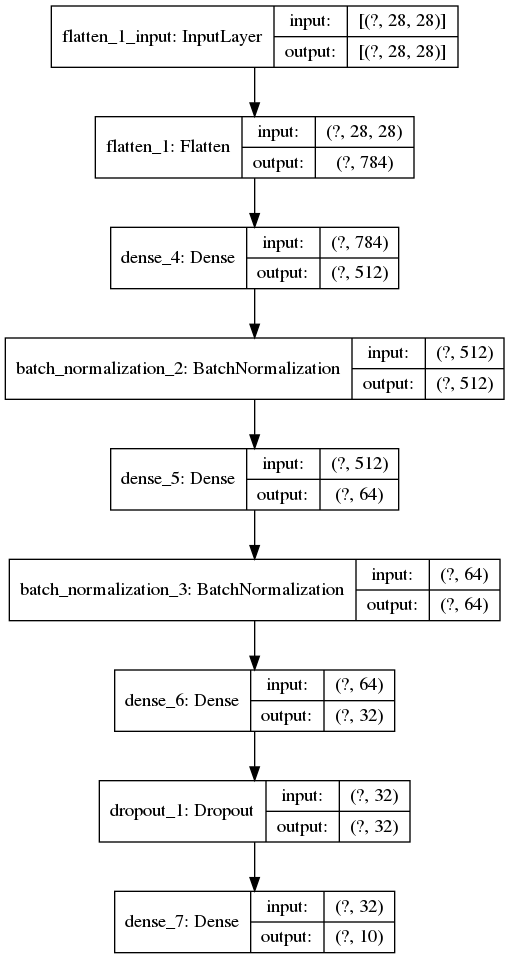

In [20]:
keras.utils.plot_model(model, show_shapes=True)

In [33]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0276 - accuracy: 0.9907 - val_loss: 0.1395 - val_accuracy: 0.9815
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0234 - accuracy: 0.9916 - val_loss: 0.1443 - val_accuracy: 0.9820
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0242 - accuracy: 0.9917 - val_loss: 0.1575 - val_accuracy: 0.9818
Epoch 4/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0239 - accuracy: 0.9915 - val_loss: 0.1707 - val_accuracy: 0.9826
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0240 - accuracy: 0.9918 - val_loss: 0.1832 - val_accuracy: 0.9780
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0247 - accuracy: 0.9914 - val_loss: 0.1680 - val_accuracy: 0.9805
Epoch 7/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.1725 - val_accuracy: 0.9797
Epoch 

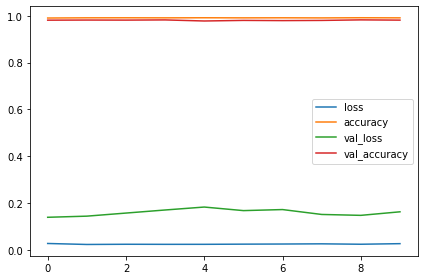

In [34]:
plt.figure()
for key in history.history.keys():
    plt.plot(history.epoch, history.history[key], label=key)
plt.legend()
plt.tight_layout()

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1551 - accuracy: 0.9834
Test accuracy:  0.9833999872207642


## Tasks for the rest of the lecture

1. Investigate the quality of the model using validation sets.
2. Limit the overfitting using the regularization and dropout.
   1. L1 regularization (Lasso regression) - $\lambda_1 \sum_{i=0}^n \left\lvert w_i\right\rvert$
   2. L2 regularization (Ridge regression) - $\lambda_2 \sum_{i=0}^n \left\lVert w_i\right\rVert$
   3. Dropout
3. Prepare its own model that will classifiy the test data with precision more than 98 percent.

# L1 and L2 regularization
- Similiar technique in the regression algorithms
- Usually loss-based approach (regularization norm is added to the loss function)
- Enforce the training process to steer towards relatively “simple” weights, which may make your model more generic
    - E.g. L1 - sparsity, correlation reduction - weights can be exactly 0
    - L2 - weights will be relatively small numbers - no extremly huge number for one weight compared to the other ones - no exact 0 weights

## How does overfit look like? (Accuracy POV)
![overfit](https://github.com/rasvob/2020-21-ARD/raw/master/images/overfit_acc.png "Overfit")

## Are there any other cases for regularization usage besides weights?
## Is L1 or L2 reg. related to Dropout somehow?

## Keras API
- kernel_regularizer: weight reg.
- bias_regularizer: bias reg.
- activity_regularizer: layer's output reg.

- E.g. tf.keras.layers.Dense(500, kernel_regularizer=tf.keras.regularizers.l1(0.01))

# Dropout
- Node sampling instead of edge sampling 
- If a node is dropped, then all incoming and outgoing connections from that node need to be dropped as well
- We sample sub-networks from the original one - basically ensemble of networks
- There won't be some "alpha" node in the individual layer with huge weight coefficient
    - Responsibility for prediction will be shared among multiple nodes

![dropout](https://github.com/rasvob/2020-21-ARD/raw/master/images/dropout.jpeg "Dropout")

## Keras API
- keras.layers.Dropout(0.5)